In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

# Riders

In [2]:
df = pd.read_csv("data/riders.csv")
df.head()

,url,first_name,last_name,full_name,nationality,birth_year,height,weight,onedayraces,gc,tt,sprint,climber,hills
0,https://www.procyclingstats.com/rider/bruno-ar...,Bruno,Armirail,Bruno Armirail,France,1994,1.90,72.0,127,677,1658,5,298,228
1,https://www.procyclingstats.com/rider/william-...,Will,Barta,Will Barta,United States,1996,1.80,61.0,71,565,725,22,254,332
2,https://www.procyclingstats.com/rider/lawson-c...,Lawson,Craddock,Lawson Craddock,United States,1992,1.78,69.0,211,862,1540,41,522,500
3,https://www.procyclingstats.com/rider/tim-wellens,Tim,Wellens,Tim Wellens,Belgium,1991,1.82,71.0,4139,4301,1406,347,2414,2854
4,https://www.procyclingstats.com/rider/jonathan...,Jonathan,Castroviejo,Jonathan Castroviejo,Spain,1987,1.71,62.0,263,2091,4574,1,1080,337


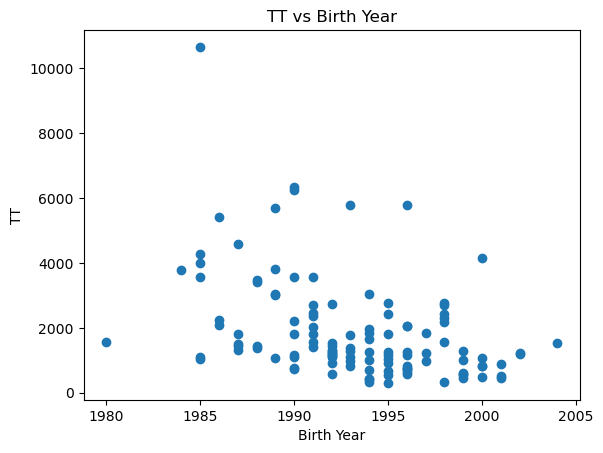

In [3]:
plt.scatter(df['birth_year'], df['tt'])
plt.xlabel('Birth Year')
plt.ylabel('TT')
plt.title('TT vs Birth Year')
plt.show()

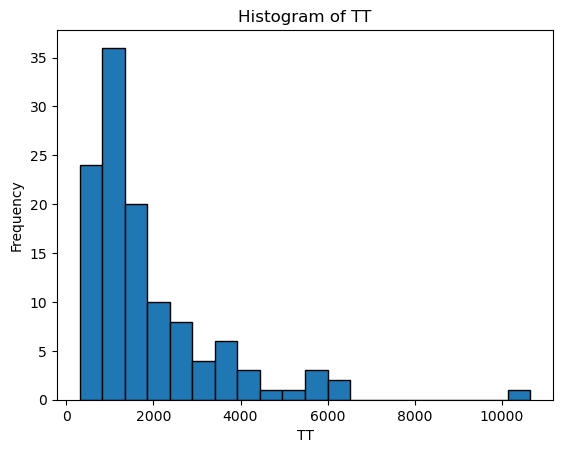

In [4]:
plt.hist(df['tt'], bins=20, edgecolor='black')
plt.xlabel('TT')
plt.ylabel('Frequency')
plt.title('Histogram of TT')
plt.show()

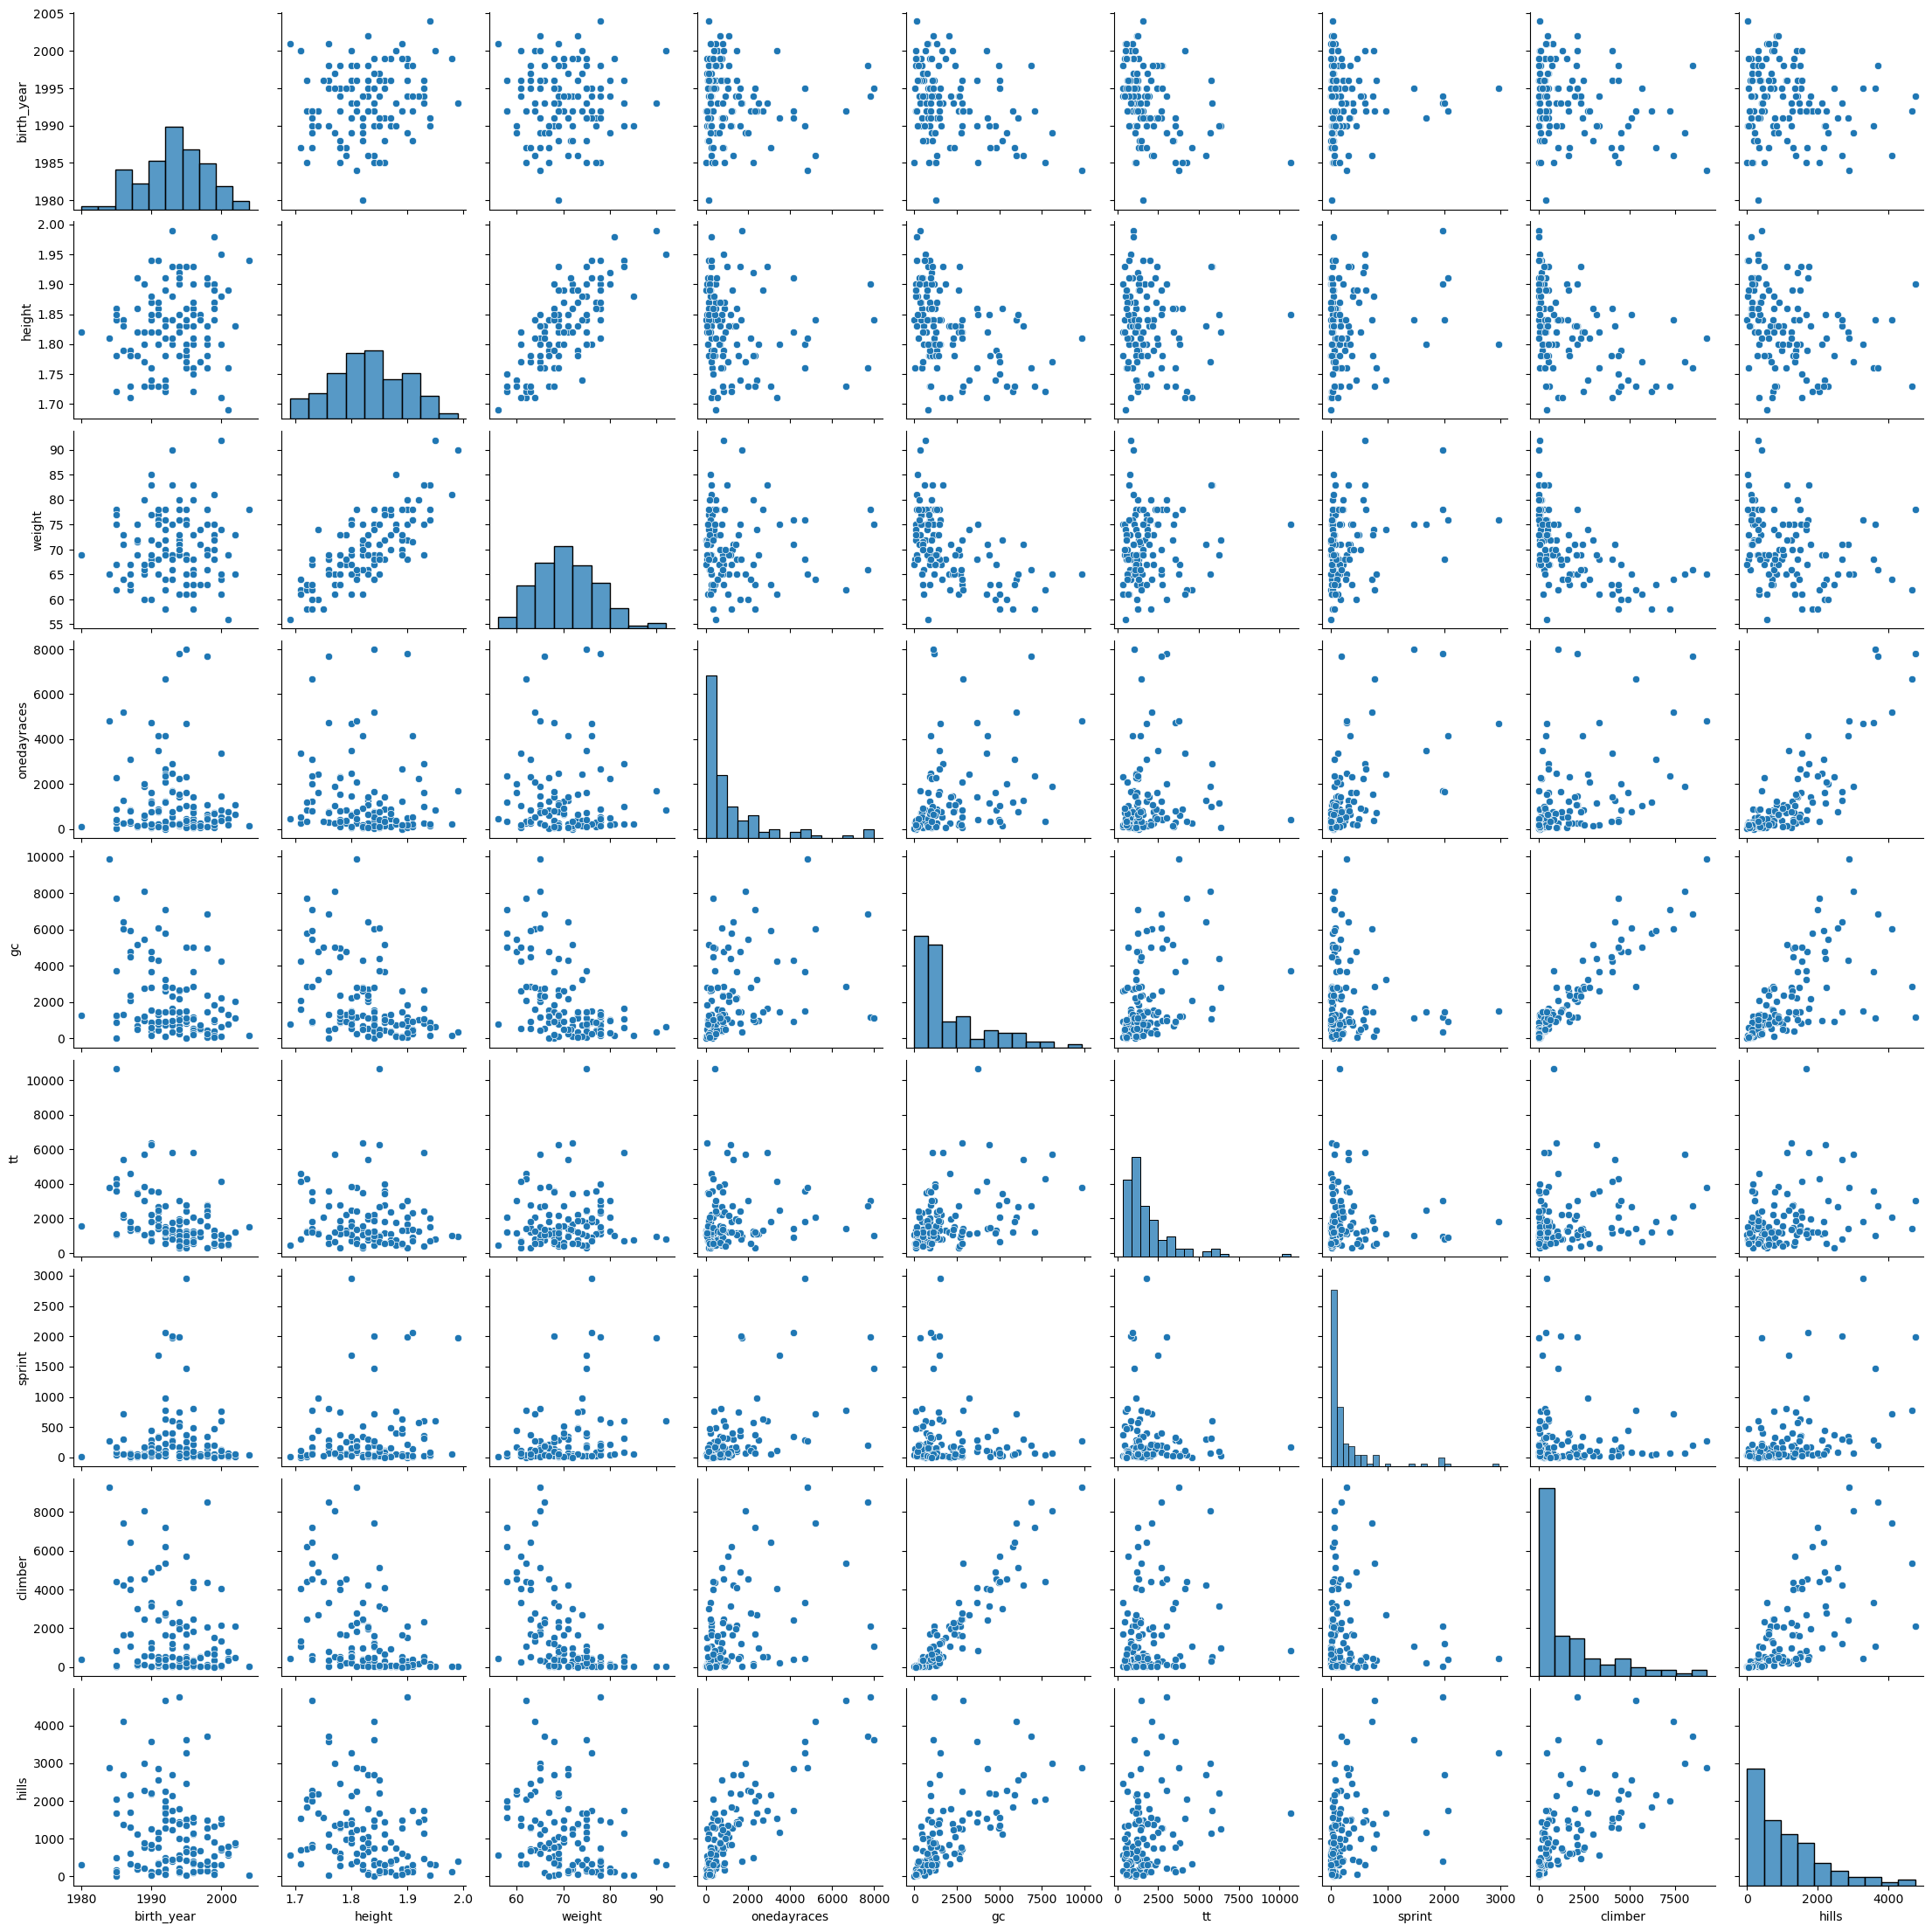

In [5]:
sns.pairplot(df.select_dtypes(include=[np.number]))
plt.show()

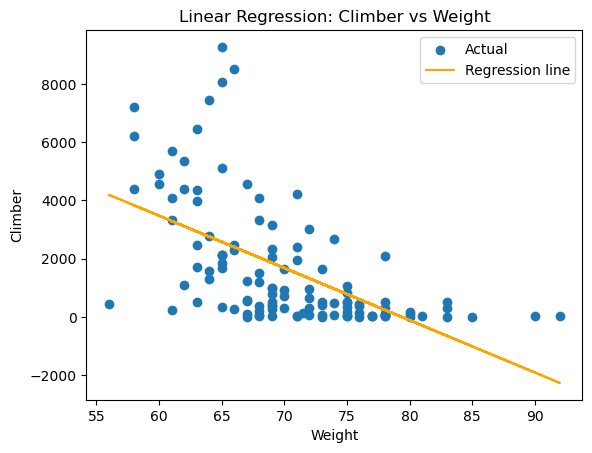

In [6]:
# Prepare the data
X = df[['weight']]
y = df['climber']

# Fit linear regression model
reg = linear_model.LinearRegression()
reg.fit(X, y)

# Predict values
y_pred = reg.predict(X)

# Plot
plt.scatter(df['weight'], df['climber'],label='Actual')
plt.plot(df['weight'], y_pred, color="orange", label='Regression line')
plt.xlabel('Weight')
plt.ylabel('Climber')
plt.title('Linear Regression: Climber vs Weight')
plt.legend()
plt.show()

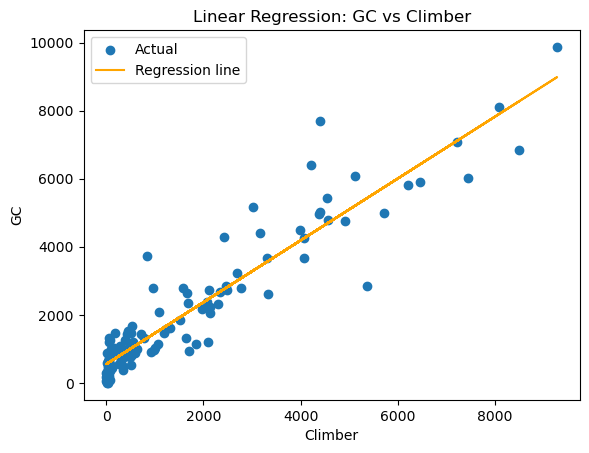

In [7]:
# Prepare the data
X = df[['climber']]
y = df['gc']

# Fit linear regression model
reg = linear_model.LinearRegression()
reg.fit(X, y)

# Predict values
y_pred = reg.predict(X)

# Plot
plt.scatter(df['climber'], df['gc'],label='Actual')
plt.plot(df['climber'], y_pred, color="orange", label='Regression line')
plt.xlabel('Climber')
plt.ylabel('GC')
plt.title('Linear Regression: GC vs Climber')
plt.legend()
plt.show()

# Races

In [3]:
races = pd.read_csv("data/races.csv")
races.head()

,race_title,date,departure,arrival,class,distance,vertical_meters,startlist_quality,profile_score,temperature,race_ranking,winner_time,profile_image_url
0,Baloise Belgium Tour 2021 Stage 2 (ITT),2021-06-10,Knokke-Heist,Knokke-Heist,2.Pro,11.20,6.0,397.0,0.0,NaN,41.0,720,https://www.procyclingstats.com/images/profile...
1,National Championships Panama ME - ITT 2022 Ti...,2022-05-06,NaN,NaN,NC,34.70,NaN,3.0,NaN,NaN,379.0,2616,NaN
2,National Championships Slovenia ME - ITT 2021 ...,2021-06-17,Koper,Koper,NC,31.50,365.0,54.0,24.0,NaN,120.0,2227,NaN
3,BinckBank Tour 2020 Stage 4 (ITT),2020-10-02,Riemst,Riemst,2.UWT,8.14,178.0,469.0,11.0,NaN,23.0,599,https://www.procyclingstats.com/images/profile...
4,National Championships France ME - ITT 2024 Ti...,2024-06-20,Pontorson,Saint-Martin-de-Landelles,NC,35.20,402.0,31.0,18.0,NaN,191.0,2623,NaN


In [4]:
races["class"].value_counts()

class
NC          137
2.UWT        79
2.1          45
2.Pro        33
CC           14
WC            9
Olympics      2
Name: count, dtype: int64

In [10]:
races_important = races[races["class"].isin(["2.UWT", "WC", "Olympics"])]
races_important = races_important[races_important["race_ranking"] < 100]

races_important.head()

,race_title,date,departure,arrival,class,distance,vertical_meters,startlist_quality,profile_score,temperature,race_ranking,winner_time,profile_image_url
3,BinckBank Tour 2020 Stage 4 (ITT),2020-10-02,Riemst,Riemst,2.UWT,8.14,178.0,469.0,11.0,NaN,23.0,599,https://www.procyclingstats.com/images/profile...
6,Critérium du Dauphiné 2024 Stage 4 (ITT),2024-06-05,Saint-Germain-Laval,Neulise,2.UWT,34.40,427.0,779.0,19.0,NaN,18.0,2509,https://www.procyclingstats.com/images/profile...
19,Tour de Suisse 2024 Stage 8 (ITT),2024-06-16,Aigle,Villars-sur-Ollon,2.UWT,15.70,875.0,744.0,160.0,NaN,22.0,2003,https://www.procyclingstats.com/images/profile...
27,Giro d'Italia 2020 Stage 1 (ITT),2020-10-03,Monreale,Palermo,2.UWT,15.10,74.0,765.0,6.0,NaN,8.0,924,https://www.procyclingstats.com/images/profile...
33,Giro d'Italia 2022 Stage 2 (ITT),2022-05-07,Budapest,Budapest,2.UWT,9.20,81.0,817.0,8.0,NaN,12.0,710,https://www.procyclingstats.com/images/profile...


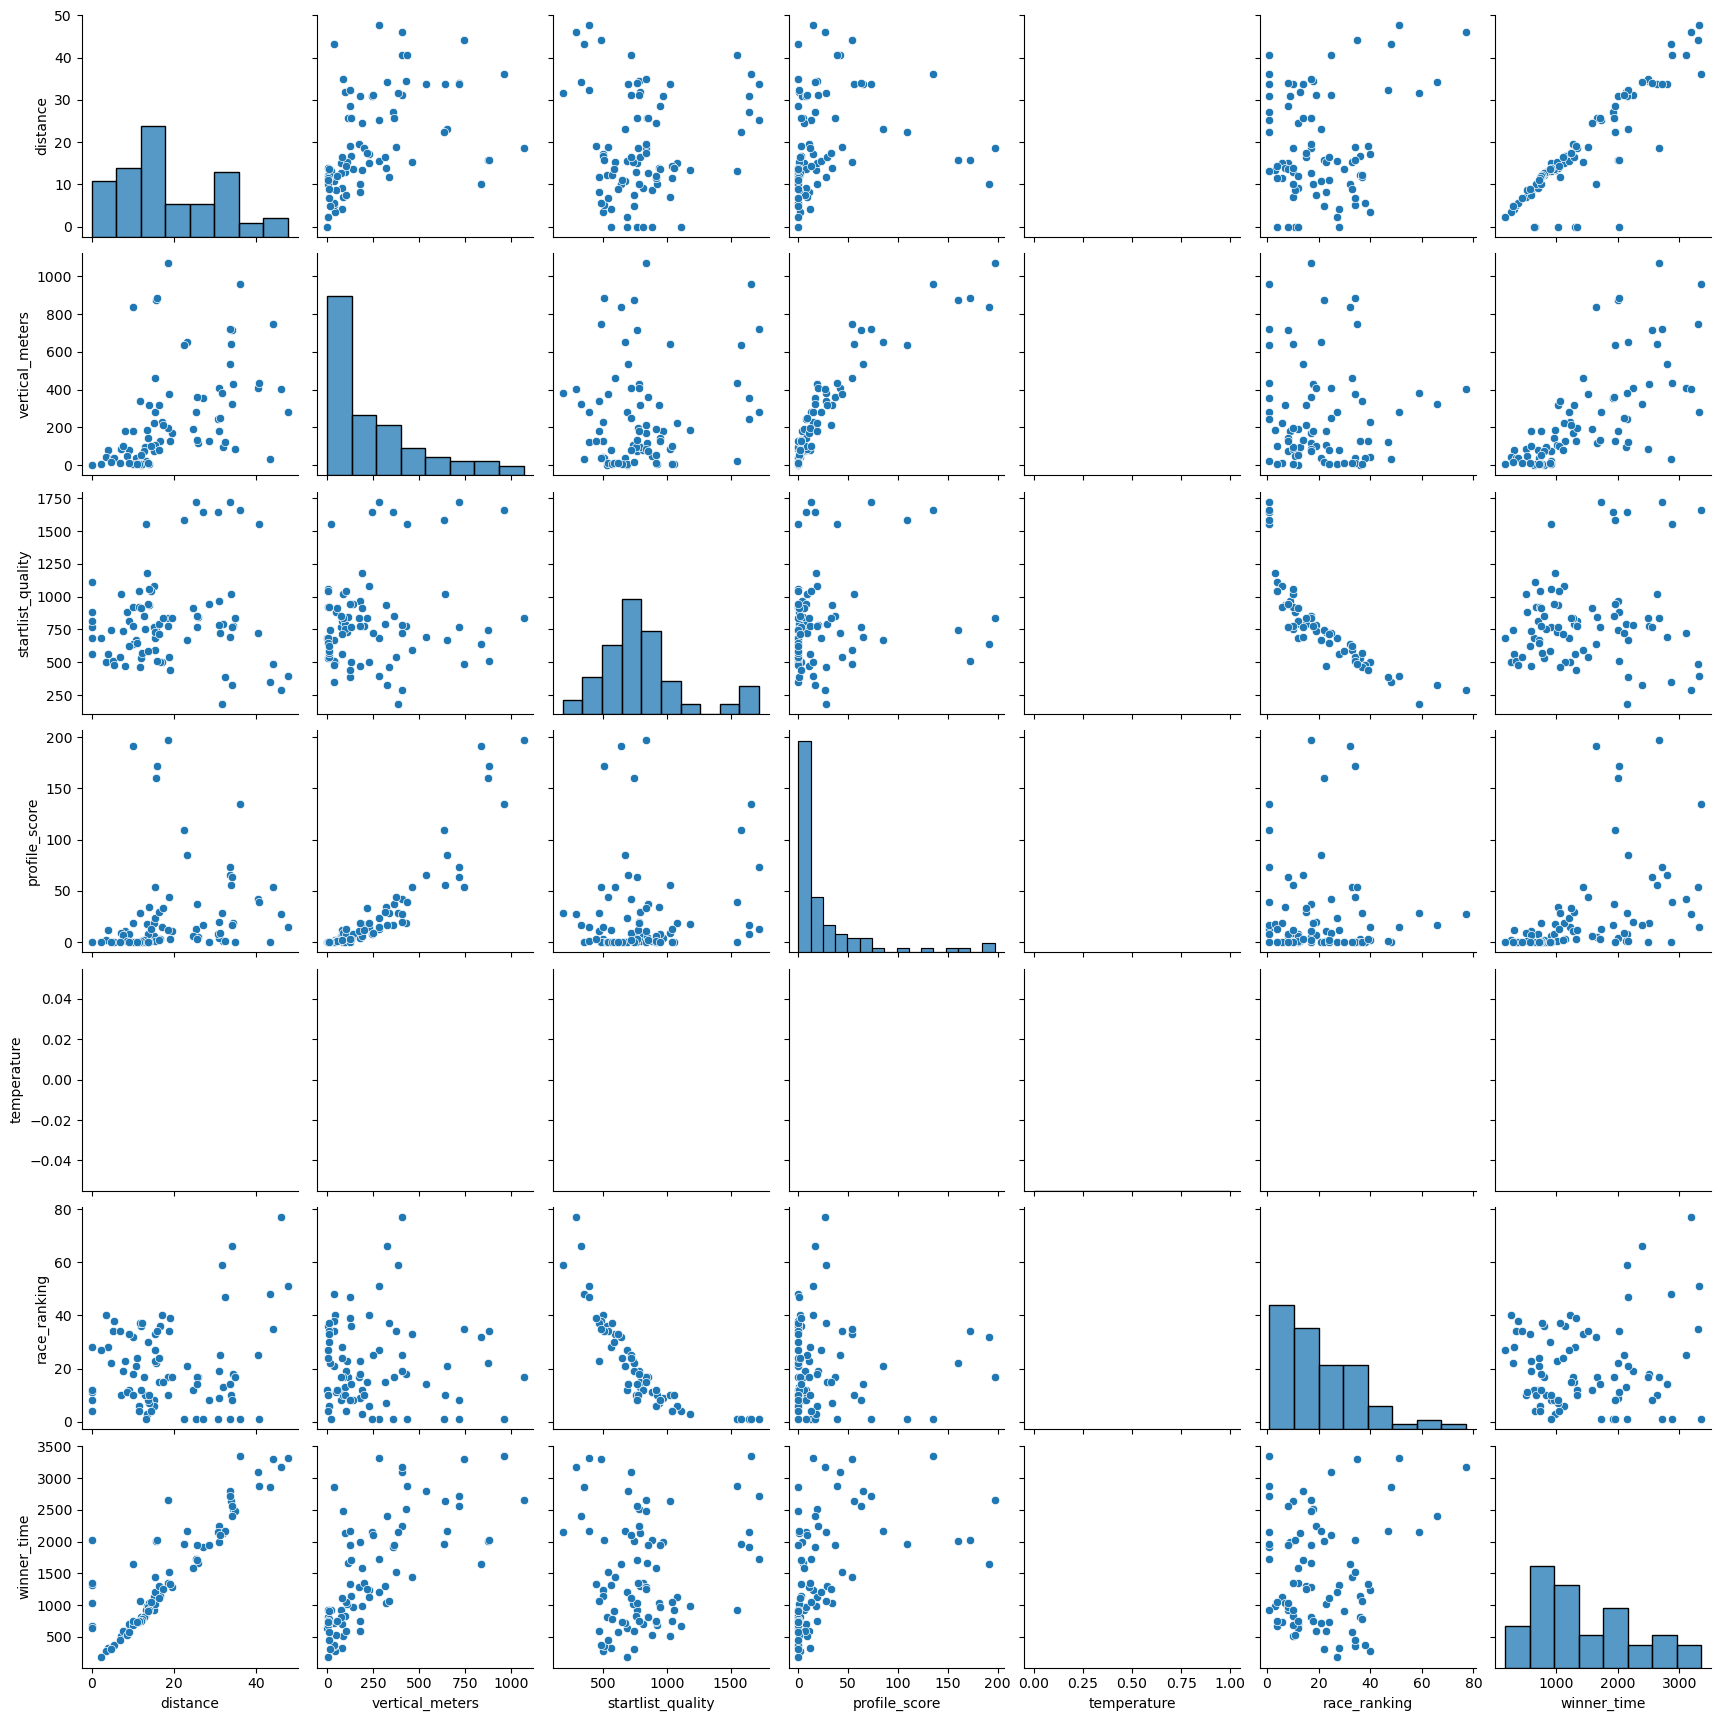

In [11]:
sns.pairplot(races_important.select_dtypes(include=[np.number]))
plt.show()